In [36]:
import pandas as pd
import seaborn as sns
train=pd.read_csv('./train.csv')

<AxesSubplot:>

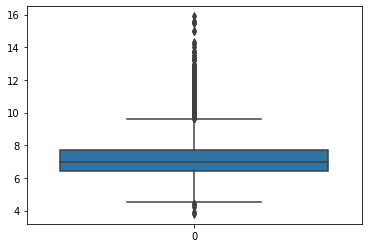

In [37]:
sns.boxplot(data=train['fixed acidity'])

In [38]:
import numpy as np
quantile_25=np.quantile(train['fixed acidity'], 0.25)
quantile_75=np.quantile(train['fixed acidity'], 0.75)
IQR=quantile_75-quantile_25
minimum=quantile_25-1.5*IQR
maximun=quantile_75+1.5*IQR
train2=train[(minimum<=train['fixed acidity'])&(train['fixed acidity']<=maximun)]

In [39]:
train2

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [40]:
train2.shape

(5203, 14)

In [41]:
train.shape[0]-train2.shape[0]

294

In [42]:
train2.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000
mean,2753.771670,5.821065,7.004132,0.332852,0.309366,5.573131,0.054088,31.337113,119.578897,0.994472,3.222862,0.521893,10.504133
std,1587.326459,0.868565,0.906623,0.162106,0.140360,4.828254,0.033831,17.536054,54.483795,0.002926,0.161715,0.143725,1.201914
min,0.000000,3.000000,4.500000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1380.500000,5.000000,6.400000,0.220000,0.240000,1.800000,0.037000,18.000000,86.000000,0.992160,3.110000,0.430000,9.500000
50%,2754.000000,6.000000,6.900000,0.290000,0.300000,3.300000,0.046000,30.000000,121.000000,0.994600,3.210000,0.500000,10.300000
75%,4129.500000,6.000000,7.500000,0.390000,0.380000,8.300000,0.060000,42.000000,157.000000,0.996660,3.330000,0.590000,11.300000
max,5496.000000,9.000000,9.600000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

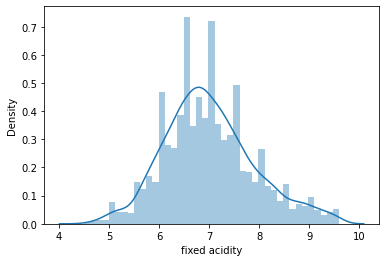

In [43]:
sns.distplot(train2['fixed acidity'])

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [45]:
scaler.fit(train[['fixed acidity']])

MinMaxScaler()

In [46]:
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scaled fixed acidity', ylabel='Density'>

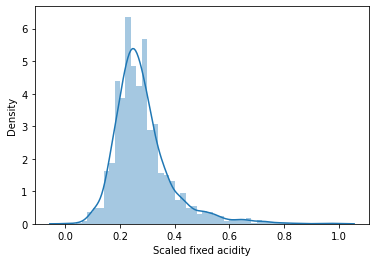

In [47]:
sns.distplot(train['Scaled fixed acidity'])

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [49]:
encoder.fit(train[['type']])

OneHotEncoder()

In [50]:
onehot = encoder.transform(train[['type']])
onehot

<5497x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5497 stored elements in Compressed Sparse Row format>

In [51]:
onehot = onehot.toarray()
onehot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [52]:
onehot = pd.DataFrame(onehot)
onehot.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [53]:
onehot.columns = encoder.get_feature_names()
onehot.head()

,x0_red,x0_white
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [54]:
train = pd.concat([train,onehot], axis = 1).drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0
